<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow import keras


"""(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
                                                         """

In [1]:
from tensorflow.keras.datasets import reuters


import numpy as np
np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# restore np.load for future normal usage
np.load = np_load_old

In [2]:
np.load.__defaults__=(None, False, True, 'ASCII')

In [3]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8982, 200), (8982,), (2246, 200), (2246,))

In [23]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 12
max_features = len(word_index.values()) + 1
maxlen = 150

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!
model = Sequential()
# Embedding layer
model.add(Embedding(max_features, 128))
# LSTM doesn't need a loop, Keras does it for us 8)
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
# Output
model.add(Dense(1, activation='sigmoid'))

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 150)
X_test shape: (2246, 150)
Build model...


In [71]:
# You should only run this cell once your model has been properly configured

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
8982/8982 [==============================] - 77s 9ms/sample - loss: -90566.3174 - accuracy: 0.0499 - val_loss: -348786.2843 - val_accuracy: 0.0396
2246/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

To pad a 'sequence' really just means to pad a matrix. So for example if you were to have sequences which were uneven in size and length, like `[2,3]` then `[3,4,4]` you can pad_sequences these sequences and they would 'fill' for lack of a better word, this `[2,3]` matrix w/ a zero. 

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTM cell units are better at long-term dependencies, essentially regular RNNs don't seem to have the ability to learn about stuff in the long-term (here's a [paper](http://www-dsi.ing.unifi.it/~paolo/ps/tnn-94-gradient.pdf) if you're interested). LSTMs are capable of learning these long-term dependencies, they are built in this way to remember/learn long-term stuff.
![yea](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1. Text classification (LSTM): it seems this is a strong point for RNNs/LSTMs.
2. Regression prediction (RNN): just good a predicting the future in general. A regression problem should be no problem for it.
3. Speech Data (LSTM): speech as an extension of text, makes this also a strong point for RNNs/LSTMs

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [16]:
!pip install google_images_download

In [17]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 4, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [154]:
# You've got something to do in this cell. ;)

import numpy as np

from IPython.display import Image

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x) # Raw softmax probs
    results = decode_predictions(features, top=1000)[0]
    frogs = 0
    for e in results:
        if (e[1] == 'bullfrog') or (e[1] == 'tree frog') or (e[1] == 'tailed frog'):
            frogs = 1
    return frogs

Image has perhaps: 1 frog.


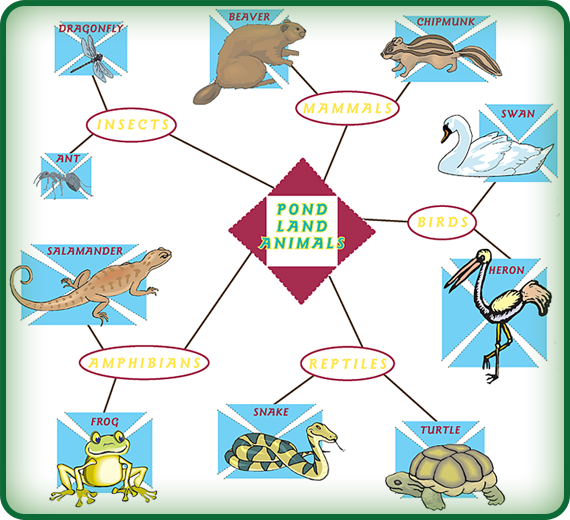

In [159]:
a = './downloads/animal pond/1.PKLS4116_inline.png'
z = img_contains_frog(process_img_path(a))
print(f'Image has perhaps: {z} frog.')
Image(filename=a, width=500)

Image has perhaps: 1 frog.


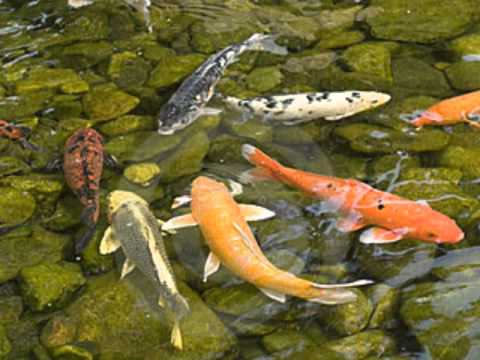

In [160]:
a = './downloads/animal pond/2.hqdefault.jpg'
z = img_contains_frog(process_img_path(a))
print(f'Image has perhaps: {z} frog.')
Image(filename=a, width=500)

Well...definitely not

Image has perhaps: 1 frog.


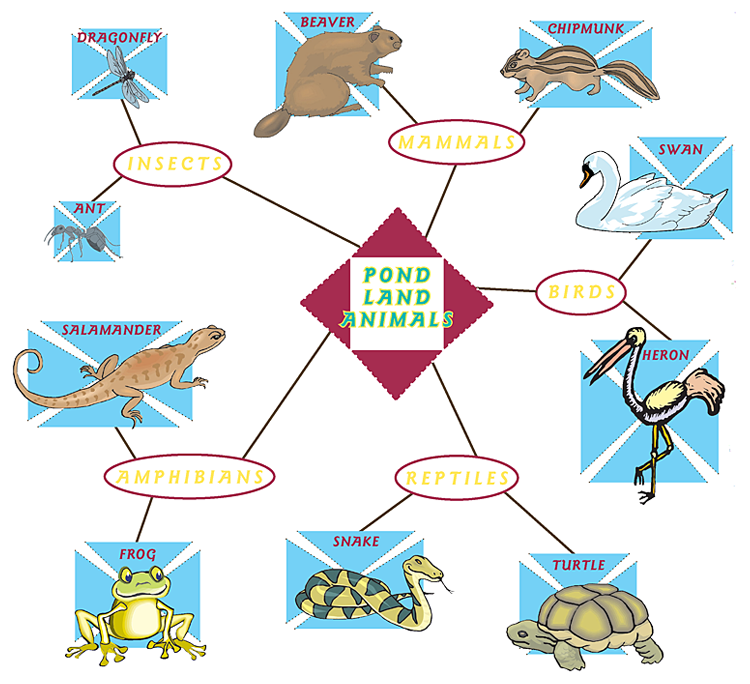

In [161]:
a = './downloads/animal pond/3.PKLS4116.png'
z = img_contains_frog(process_img_path(a))
print(f'Image has perhaps: {z} frog.')
Image(filename=a, width=500)

Image has perhaps: 1 frog.


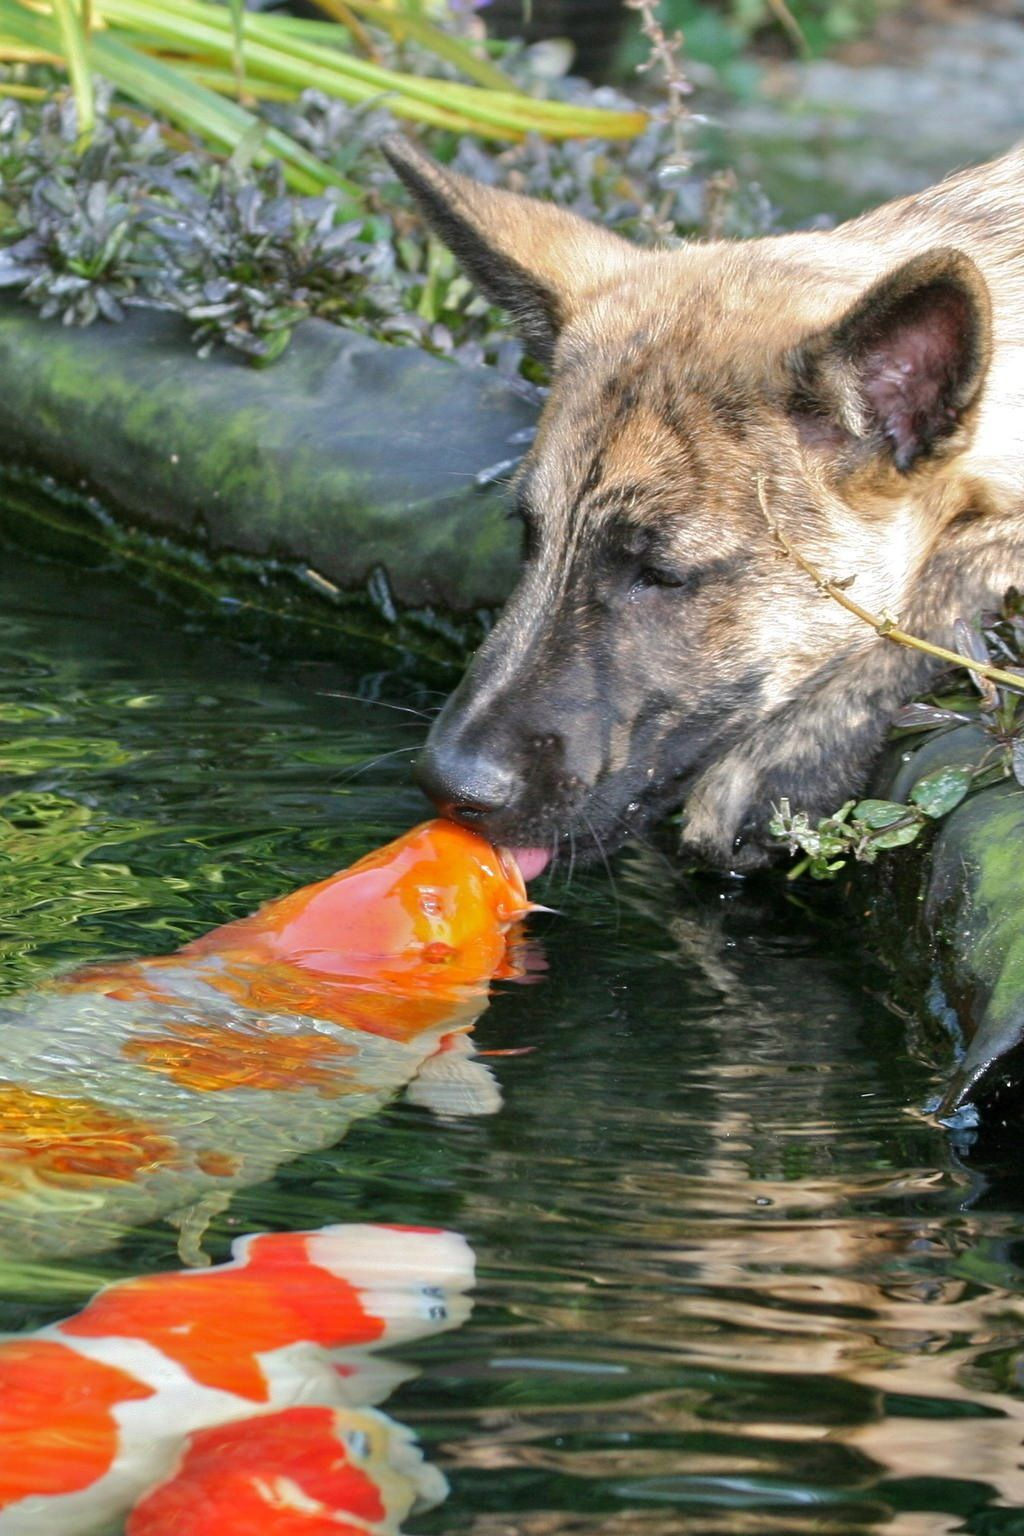

In [162]:
a = './downloads/animal pond/4.12aee2aa186a7b69a66563f138bba822.jpg'
z = img_contains_frog(process_img_path(a))
print(f'Image has perhaps: {z} frog.')
Image(filename=a, width=500)

Yea...

Wow so specific, African hunting dog. Yea idk, it's all over the place for this...

But it technically loaded the images! Lol

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

Thank god, cause the output ain't working lol

In [163]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        x = image.img_to_array(x)
        #x = np.expand_dims(x, axis=1)
        x = preprocess_input(x)
        image_data.append(x)
        frogs.append(img_contains_frog(x))
    
    return image_data,frogs

ValueError: cannot select an axis to squeeze out which has size not equal to one

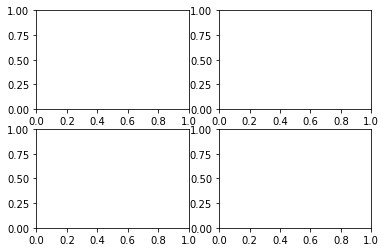

In [164]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

Not really sure why this is acting up

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

Use Case Uno: *Dimensionality reduction*!
The autoencoder crushes the thing you give it into a fixed length vector to learn the *most important properties* you could give it. Encodes from left side of network. Decodes when the data comes out of the core of the hourglass. It's perfect because in trying to predict its own input you learn which features are the most influential. Crazy.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

## 1. What do you consider your strongest area, as a Data Scientist? 
    My greatest strength as a data scientist is definitely the programming itself. The act of making the computer do what you want to and for the data in terms of simple to complex software development patterns.

## 2. What area of Data Science would you most like to learn more about, and why?
    I would love to fully understand the abyss that is the mathematics of machine learning etc. Especially in regards to neural networks. It feels as though getting a neurobiology degree would help in some crazy complex way with all these things.

## 3. Where do you think Data Science will be in 5 years?
    Data Science will be regarded as a harbinger of a lot of bad things in society, unfortunately. As a profession it'll probably be even more lucrative as this surveillance capitalsm society hoovers up even more data from unwitting places and people. 

## 4. What are the threats posed by AI to our society?
    
    Well if you've ever read I Have No Mouth and I Must Scream you'll certainly see why. Besides that extreme case, if left unchecked, Artificial Intelligence has the potential to make a few very people ultra-rich, beyond anything imaginable. Which wouldn't be so horrific if it weren't at the expense of the rest of the population at the world. If AI is not developed for the public good, we have a serious, potentially irreversible shift in power towards corporations.

## 5. How do you think we can counteract those threats? 
    Reduce the influence of corporations on government. Besides that, if we invest in maintaining productive and strong relationships we allied countries (yea yea this is a US-centric perspective) and create a network of cooperation, we can reduce the influence of bad actors on our government officials. And then with consensus, determine what should not be allowed. And if we have to, try and suppress illegal AI activity abroad in countries that feel like being uncooperative (read: bad).

## 6. Do you think achieving General Artifical Intelligence is ever possible?
    Why not? Given enough time we could probably do anything as humans.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [6]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")